# Quad 45 bin proposal

**Motivation:** Rui + I worked on a bin proposal for categories for rev $\Delta \eta_{hh}$, so for these different tables that we're making, I *might as well* rinse + repeat this study for these new binnings too :)

In [11]:
{import pandas as pd
import numpy as np
from tqdm import tqdm
import json
from itertools import product
from glob import glob
import uproot
import matplotlib.pyplot as plt
from matplotlib import gridspec
import pyhf

import operator as SmoothOperator 
from crypto_utils import *

import os
os.sys.path += ['../non-resonant-studies', "../PyATLASstyle/", "../stats-results/"]

from quad45_2x2 import res_bin_edges

# Let's do ATLAS style plots too!
import matplotlib as mpl
import PyATLASstyle as pas
pas.applyATLASstyle(mpl)

%load_ext autoreload
%autoreload 2
}

python run_limits.py -d ../data/RR/cryptotuples/quad_45/data16_Xhh_45_NN_100_bootstraps.root ../data/RR/cryptotuples/quad_45/data17_Xhh_45_NN_100_bootstraps.root ../data/RR/cryptotuples/quad_45/data18_Xhh_45_NN_100_bootstraps.root -s ../../hh4b/hh4b-resolved-reconstruction/SMNR_pythia_mc16a.root ../../hh4b/hh4b-resolved-reconstruction/SMNR_pythia_mc16d.root ../../hh4b/hh4b-resolved-reconstruction/SMNR_pythia_mc16e.root -y 16 17 18 --no-norm --underflow --overflow  --outDir ../stats-results/Q45/  --backend jax --systvar m_h1 m_h2 --HTcut 124 117  --corr_cat --corr_Xhh --btagCats 4b --bins 275 297 321 346 374 404 436 471 509 550 594 641 692 748 808 872 942 1018 1099 --label res_p08_  --categorize dEta_hh  --corr_cat --corr_Xhh

python run_limits.py -d ../data/RR/cryptotuples/quad_45/data16_Xhh_45_NN_100_bootstraps.root ../data/RR/cryptotuples/quad_45/data17_Xhh_45_NN_100_bootstraps.root ../data/RR/cryptotuples/quad_45/data18_Xhh_45_NN_100_bootstraps.root -s ../../hh4b/hh4b-resolved-recon

../PyATLASstyle/PyATLASstyle.py:12: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [2]:
# def res_bin_edges(lo, hi, res, to_nearest=1):

#     def round_extra(x, base=5): return base*round(x/base)

#     bins, edge = [lo], lo
#     while edge < hi:
#         edge = edge*(1 + res)
#         bins.append(edge)
  
#     bins = [round_extra(edge, to_nearest) for edge in bins ]

#     return np.array(bins)

In [3]:
cat_2x2 = [
            { "name": "$X_{hh}$ < 0.95, $\Delta \eta_{hh}$ < 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.lt],
              "vals": [0.95, 0.75],

            },
            { "name": "$X_{hh}$ < 0.95, $\Delta \eta_{hh}$ > 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.gt],
              "vals": [0.95, 0.75],

            },
            { "name": "$X_{hh}$ > 0.95, $\Delta \eta_{hh}$ < 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt],
              "vals": [0.95, 0.75],

            },
            { "name": "$X_{hh}$ > 0.95, $\Delta \eta_{hh}$ > 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.gt],
              "vals": [0.95, 0.75],

            },

          ]


In [4]:
# 2 SRs, 3 deta_hh regions
cat_2x3 = [
            { "name": "$X_{hh}$ < 0.95, $\Delta \eta_{hh}$ < 0.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.lt],
              "vals": [0.95, 0.5],

            },
            { "name": "$X_{hh}$ < 0.95,  0.5 < $\Delta \eta_{hh}$ < 1",
              "vars": ["X_hh","dEta_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.gt, SmoothOperator.lt],
              "vals": [0.95, 0.5,1],

            },
            { "name": "$X_{hh}$ < 0.95,  1 < $\Delta \eta_{hh}$ < 1.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.gt],
              "vals": [0.95, 1],

            },
            { "name": "$X_{hh}$ > 0.95, $\Delta \eta_{hh}$ < 0.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt],
              "vals": [0.95, 0.5],

            },
            { "name": "$X_{hh}$ > 0.95, 0.5 < $\Delta \eta_{hh}$ < 1",
              "vars": ["X_hh","dEta_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.gt, SmoothOperator.lt],
              "vals": [0.95, 0.5,1],

            },
            { "name": "$X_{hh}$ > 0.95, 1 < $\Delta \eta_{hh}$ < 1.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.gt],
              "vals": [0.95, 1],

            },

          ]

**Note on the SR optimization**

Since we sort of have this mentality that we choose the SR to maximize the correctly paired signal, I decided to choose the SR boundaries using the quantiles of our current SR.

In [5]:
# 3 SRs, 2 deta_hh regions
cat_3x2 = [
            # SR in 
            { "name": "$X_{hh}$ < 0.74, $\Delta \eta_{hh}$ < 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.lt],
              "vals": [0.74, 0.75],

            },
            { "name": "$X_{hh}$ < 0.74, $\Delta \eta_{hh}$ > 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.gt],
              "vals": [0.74, 0.75],

            },
            # SR mid
            { "name": "0.74 < $X_{hh}$ < 1.14, $\Delta \eta_{hh}$ < 0.75",
              "vars": ["X_hh","X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt, SmoothOperator.lt],
              "vals": [0.74, 1.14, 0.75],

            },
            { "name": "0.74 < $X_{hh}$ < 1.14, $\Delta \eta_{hh}$ > 0.75",
              "vars": ["X_hh","X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt,  SmoothOperator.gt],
              "vals": [0.74, 1.14, 0.75],

            },
            # SR out
            { "name": "$X_{hh}$ > 1.14, $\Delta \eta_{hh}$ < 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt],
              "vals": [1.14, 0.75],

            },
            { "name": "$X_{hh}$ > 1.14, $\Delta \eta_{hh}$ > 0.75",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.gt],
              "vals": [1.14, 0.75],

            },

          ]

In [6]:
# 3 SRs, 3 deta_hh regions
cat_3x3 = [
            # SR in 
            { "name": "$X_{hh}$ < 0.74, $\Delta \eta_{hh}$ < 0.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.lt],
              "vals": [0.74, 0.5],

            },
            { "name": "$X_{hh}$ < 0.74, 0.5 < $\Delta \eta_{hh}$ < 1",
              "vars": ["X_hh","dEta_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.gt, SmoothOperator.lt],
              "vals": [0.74, 0.5, 1],

            },
            { "name": "$X_{hh}$ < 0.74, 1 < $\Delta \eta_{hh}$ < 1.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.lt, SmoothOperator.gt],
              "vals": [0.74, 1],

            },
            # SR mid
            { "name": "0.74 < $X_{hh}$ < 1.14, $\Delta \eta_{hh}$ < 0.5",
              "vars": ["X_hh","X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt, SmoothOperator.lt],
              "vals": [0.74, 1.14, 0.5],

            },
            { "name": "0.74 < $X_{hh}$ < 1.14, 0.5 < $\Delta \eta_{hh}$ < 1",
              "vars": ["X_hh","X_hh","dEta_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt,SmoothOperator.gt, SmoothOperator.lt],
              "vals": [0.74, 1.14, 0.5, 1],

            },
            { "name": "0.74 < $X_{hh}$ < 1.14, 1 < $\Delta \eta_{hh}$ < 1.5",
              "vars": ["X_hh","X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt,  SmoothOperator.gt],
              "vals": [0.74, 1.14, 1],

            },
            # SR out
            { "name": "$X_{hh}$ > 1.14, $\Delta \eta_{hh}$ < 0.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.lt],
              "vals": [1.14, 0.5],

            },
            { "name": "$X_{hh}$ > 1.14, 0.5 < $\Delta \eta_{hh}$ < 1",
              "vars": ["X_hh","dEta_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.gt, SmoothOperator.lt],
              "vals": [1.14, 0.5, 1],

            },
            { "name": "$X_{hh}$ > 1.14, 1 < $\Delta \eta_{hh}$ < 1.5",
              "vars": ["X_hh","dEta_hh"],
              "ops" : [SmoothOperator.gt, SmoothOperator.gt],
              "vals": [1.14, 1],

            },

          ]

In [7]:
BDIR  = '../data/RR/cryptotuples/'
B_Q45     = [f"{BDIR}quad_45/data{yr}_Xhh_45_NN_100_bootstraps.root" for yr in [16,17,18]]

dfs = load_df(B_Q45)

In [8]:
dfs.keys()

dict_keys(['df_16', 'norm_16', 'norm_VR_16', 'norm_IQR_16', 'norm_3b1f_16', 'norm_VR_3b1f_16', 'norm_IQR_3b1f_16', 'df_17', 'norm_17', 'norm_VR_17', 'norm_IQR_17', 'norm_3b1f_17', 'norm_VR_3b1f_17', 'norm_IQR_3b1f_17', 'df_18', 'norm_18', 'norm_VR_18', 'norm_IQR_18', 'norm_3b1f_18', 'norm_VR_3b1f_18', 'norm_IQR_3b1f_18'])

In [28]:
def visErrsDfs(dfs,edg,catList,blabel='',leg=True,
               ltitle='',rtitle='',figDir='',tag=''):
    '''
    Function to quickly vizualize the errors for the categories that we have 
    for the category binning studies.
    '''
        
    widths = e[1:] - e[:-1]
    xx = 0.5 * (e[1:] + e[:-1])

    e_uf = e.copy().astype(float)
    e_uf[0] = 0
    e_uf[-1] = np.inf
    
    get_hists(dfs, e_uf, catList=catList)
    
    gs = {'wspace':0.12, 'hspace':0.1}

    nCats = len(catList)

    fig,axes = plt.subplots(3,nCats,figsize=(6*nCats,12),gridspec_kw=gs)
    lw = 3

    for i,ax_row,yr in zip(range(3),axes[::-1],[16,17,18]):

        for j,ax,category in zip(range(nCats),ax_row,catList):

            ti = category['name']

            k = i*3+j

            nom   = dfs[f'bkg{blabel}_{yr}:{ti}']
            poiss = dfs[f'poiss{blabel}_{yr}:{ti}']
            BS    = dfs[f'bs{blabel}_{yr}:{ti}']

            stat = np.sqrt(poiss**2 + BS**2)

            ax.hist(xx[nom!=0], e, histtype='step', color='mediumpurple',
                    weights=(stat/nom)[nom!=0],label=f'BS+poiss',lw=lw)

            for qi, color in zip(['Q1','Q2','Q3','Q4'],['forestgreen','C3','royalblue','darkorange']):
                n_VR = dfs[f'{qi}{blabel}_{yr}:{ti}']
                ax.hist(xx[nom!=0], e, histtype='step', color=color,
                           weights=(np.abs(nom-n_VR)/nom)[nom!=0],
                           label=f'{qi} syst',lw=lw)

            ax.set_xlim(e[0],e[-1])
            _,ymax = ax.get_ylim()
            if ymax < 0.3:
                ax.set_ylim(0,0.3)

            if i ==0: ax.set_xlabel('$m_{hh}$ bins [arbitrary units]',loc='right')
            if j ==0: ax.set_ylabel('Relative error',loc='top')
            ax.text(.03,.95,f'data 20{yr}',ha='left',va='top',transform=ax.transAxes)
            ax.text(.03,.85,ti,ha='left',va='top',transform=ax.transAxes)
            ax.legend()

    axes[0,0].set_title(ltitle,ha='left',x=0)
    axes[0,-1].set_title(rtitle,ha='right',x=1)
    if tag:
        plt.savefig(f'{figDir}/relErr_{tag}.pdf',bbox_inches='tight')
            
    plt.show()

In [15]:
# for k in dfs.keys():
#     print(k)

In [19]:
figDir='figures/ggF_PUSH/bin_opt/Q45/'

### 2x2 proposals

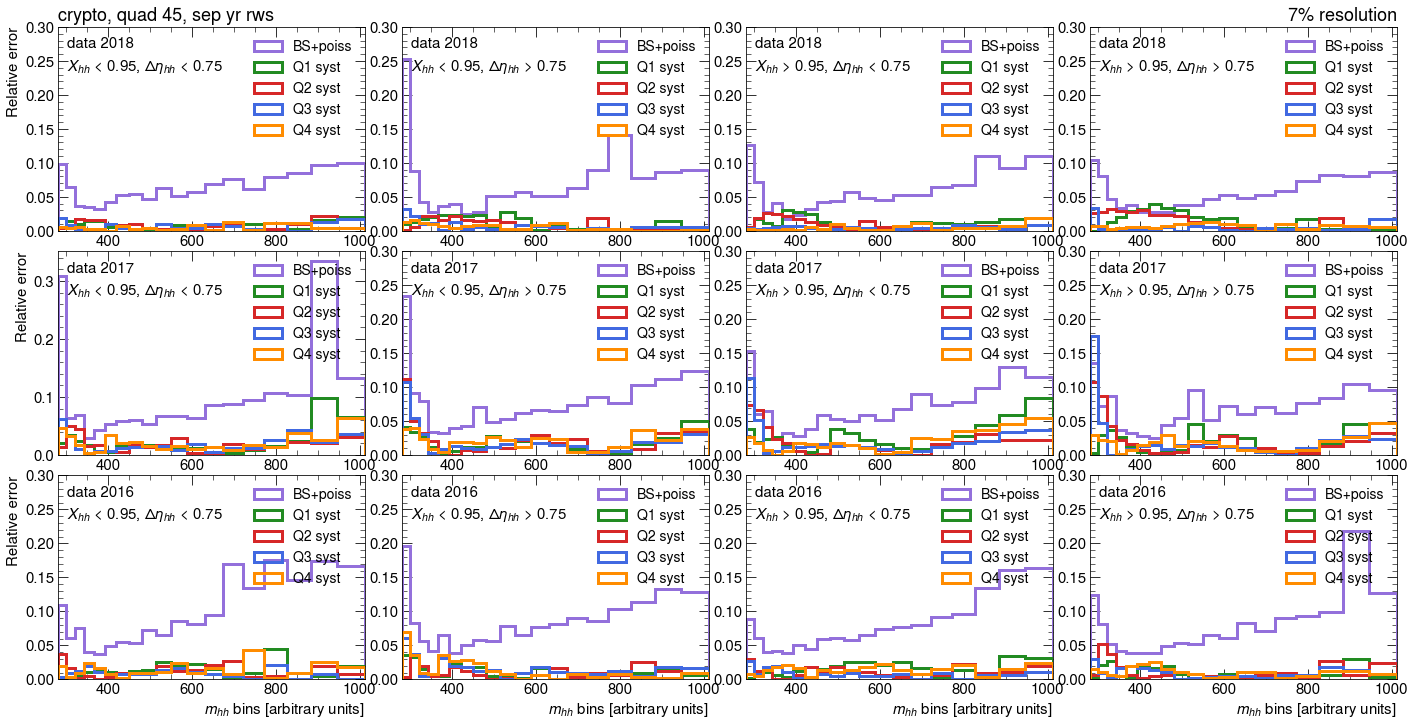

In [34]:
lo, hi = 280,950
res = 0.07
e = res_bin_edges(lo,hi,res)

# The fct below already will take care of over / under flow
visErrsDfs(dfs,e,catList=cat_2x2,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'2_Xhh_2_deta_{lo}_{hi}_res_{res}')

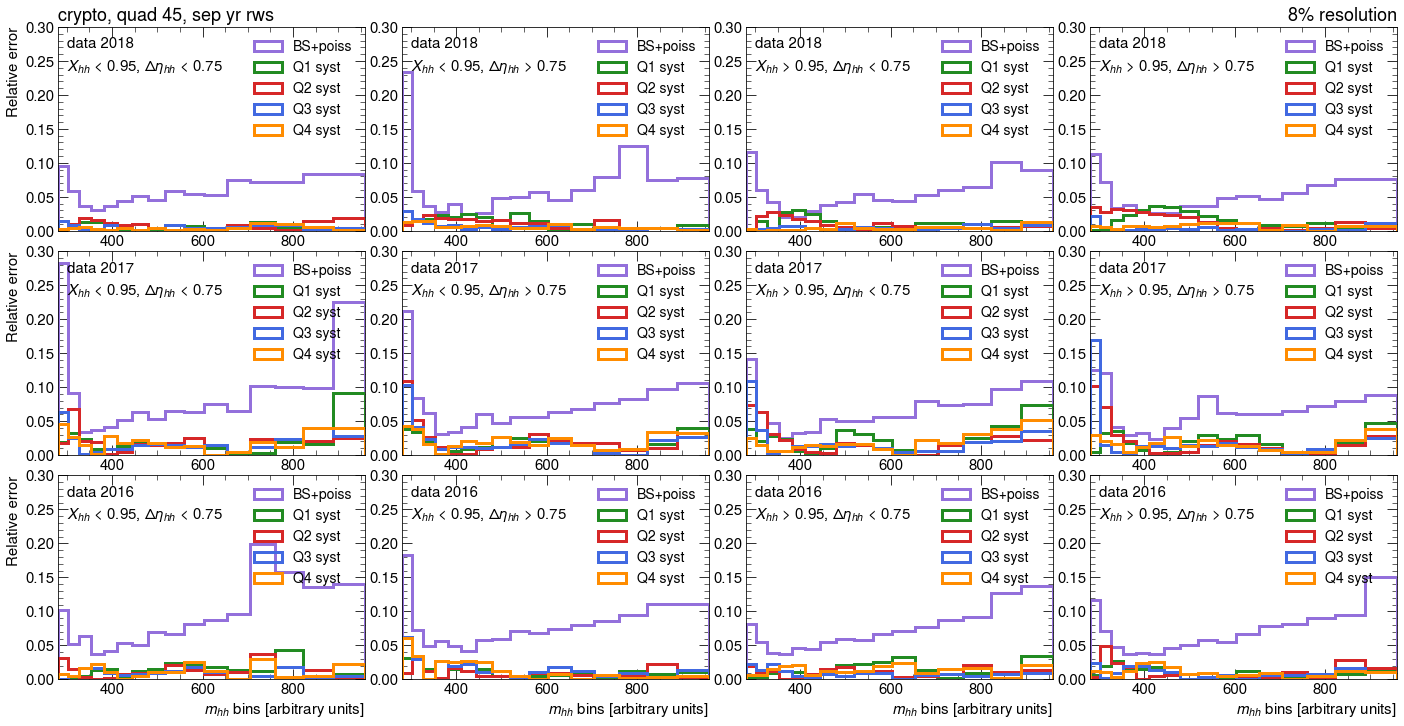

In [32]:
lo, hi = 280,950
res = 0.08
e = res_bin_edges(lo,hi,res)

# The fct below already will take care of over / under flow
visErrsDfs(dfs,e,catList=cat_2x2,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'2_Xhh_2_deta_{lo}_{hi}_res_{res}'
          )

In [38]:
lo, hi = 280,950
res = 0.09
e = res_bin_edges(lo,hi,res)

# The fct below already will take care of over / under flow
visErrsDfs(dfs,e,catList=cat_2x2,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'2_Xhh_2_deta_{lo}_{hi}_res_{res}')

In [40]:
e

array([ 280,  305,  333,  363,  395,  431,  470,  512,  558,  608,  663,
        723,  788,  858,  936, 1020])

Honestly - 9% looks the best here. But maybe I should be less concerned about the $\gamma$ factors than the shape systs?

### 2x3

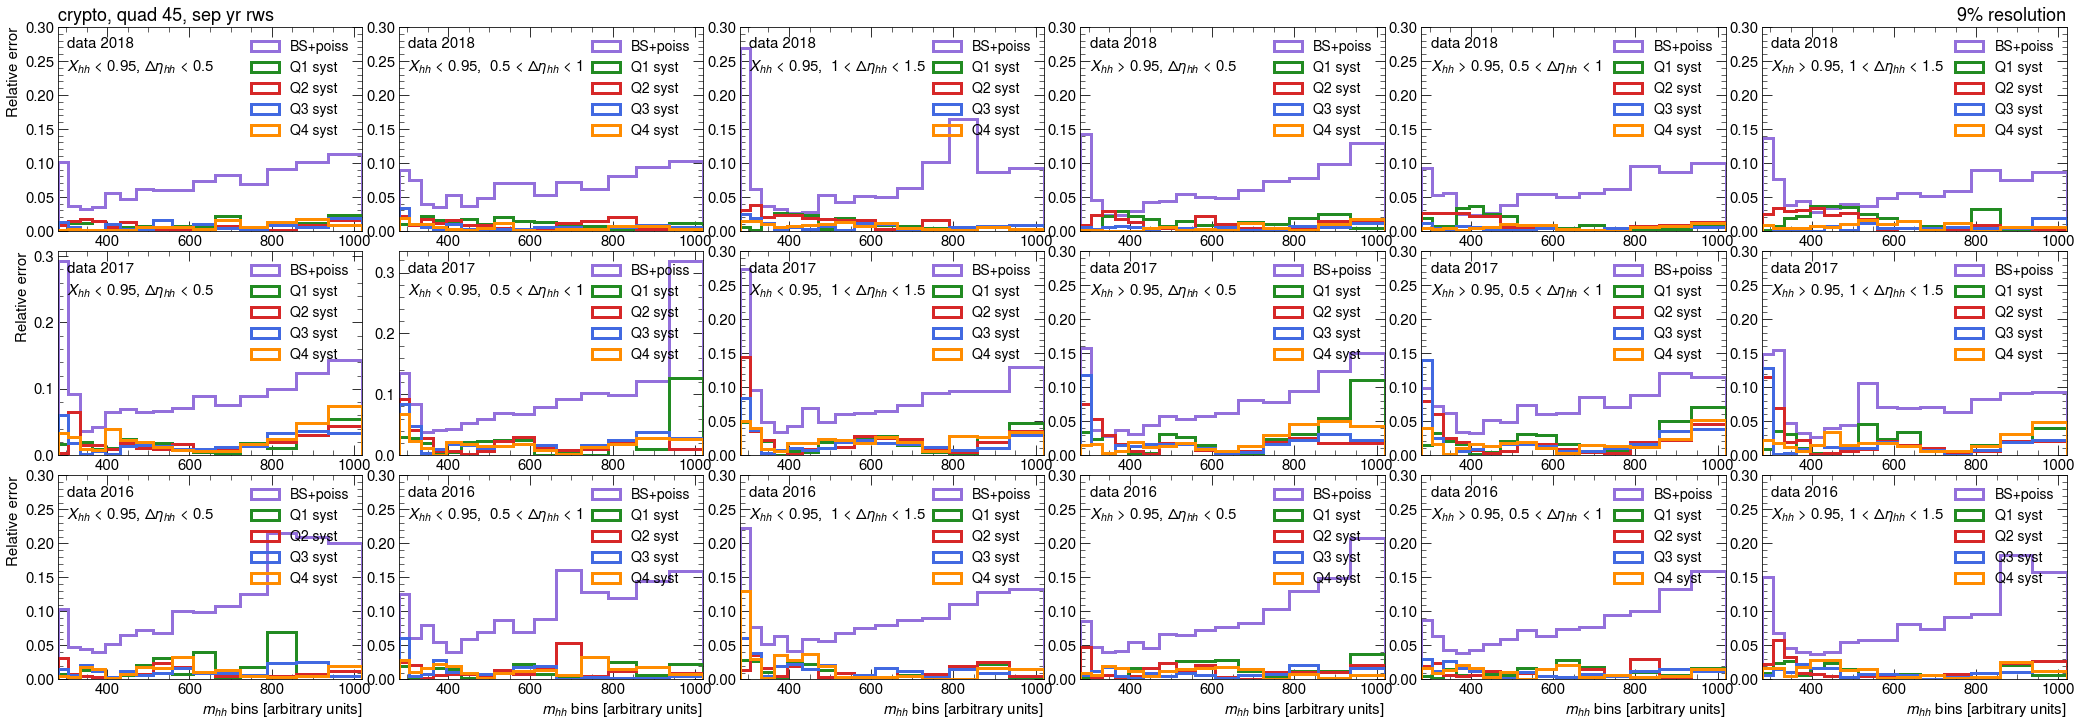

In [42]:
lo, hi = 280,950
res = 0.09
e = res_bin_edges(lo,hi,res)

visErrsDfs(dfs,e,catList=cat_2x3,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'2_Xhh_3_deta_{lo}_{hi}_res_{res}')

### 3x2

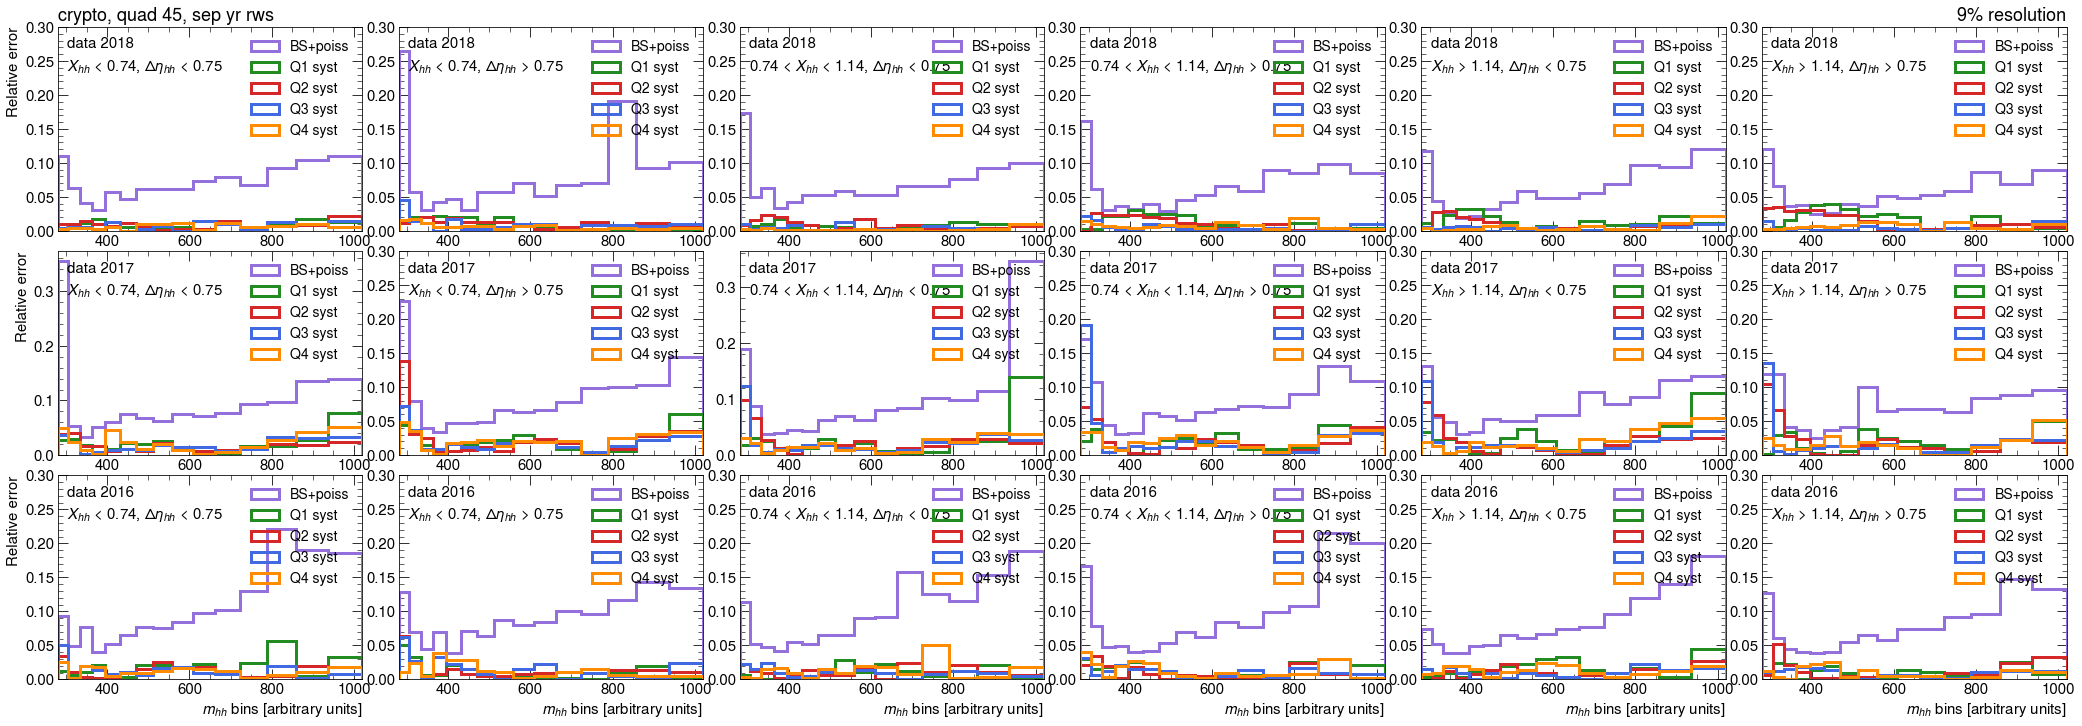

In [43]:
lo, hi = 280,950
res = 0.09
e = res_bin_edges(lo,hi,res)

visErrsDfs(dfs,e,catList=cat_3x2,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'3_Xhh_2_deta_{lo}_{hi}_res_{res}')

### 3x3

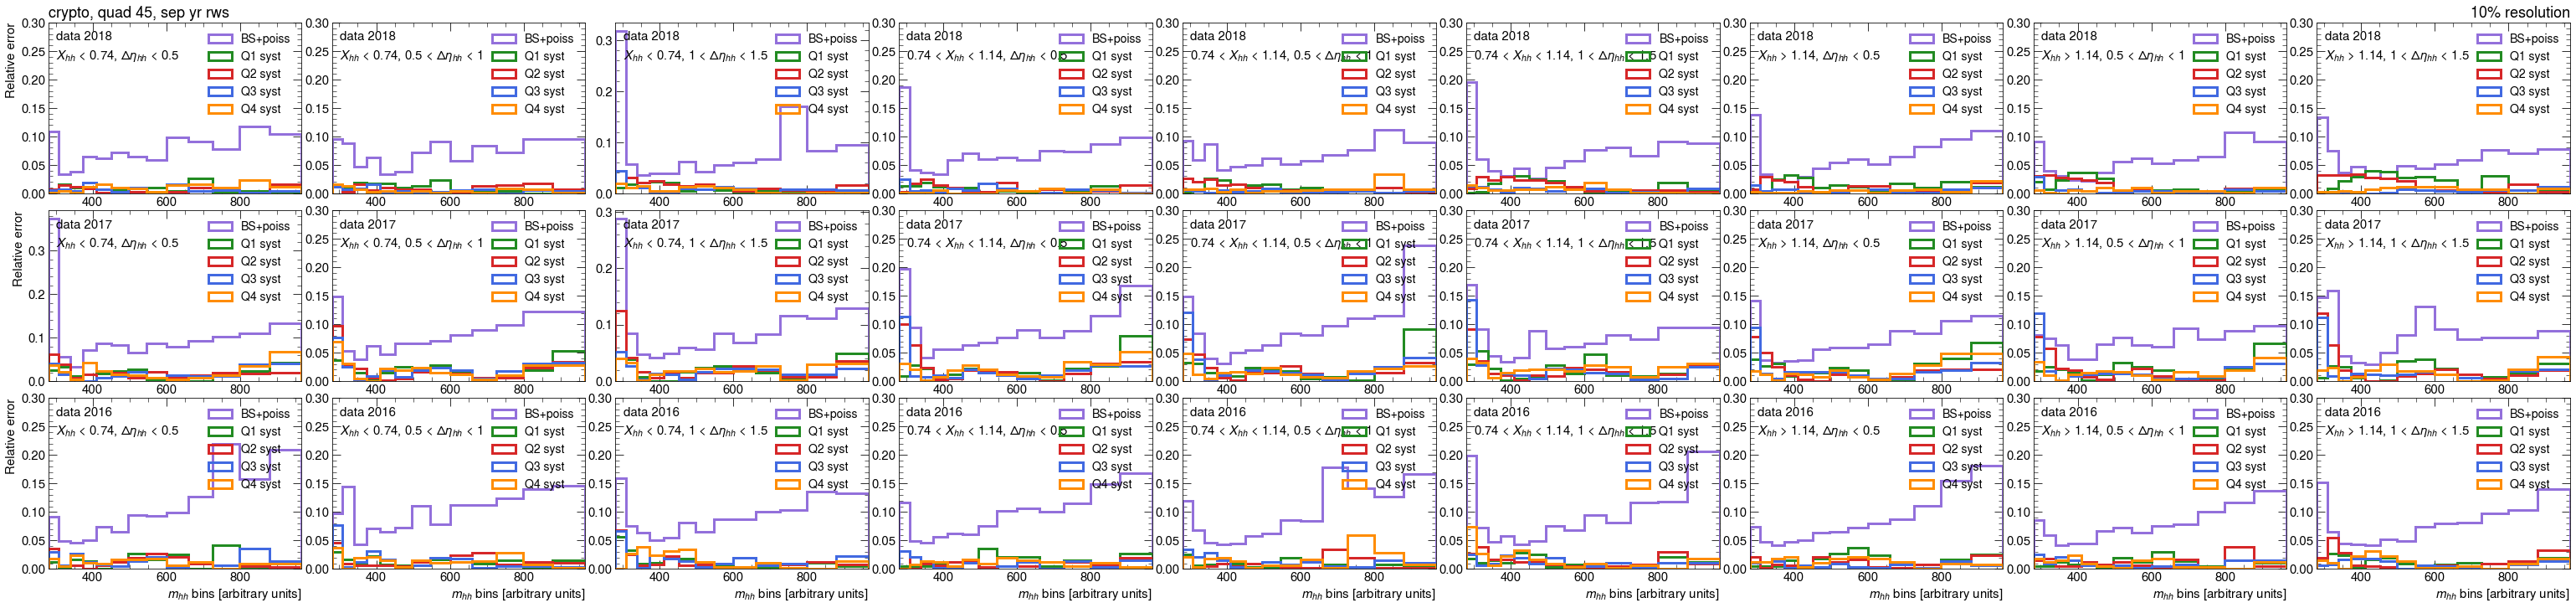

In [44]:
lo, hi = 280,950
res = 0.1
e = res_bin_edges(lo,hi,res)

visErrsDfs(dfs,e,catList=cat_3x3,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'3_Xhh_3_deta_{lo}_{hi}_res_{res}')

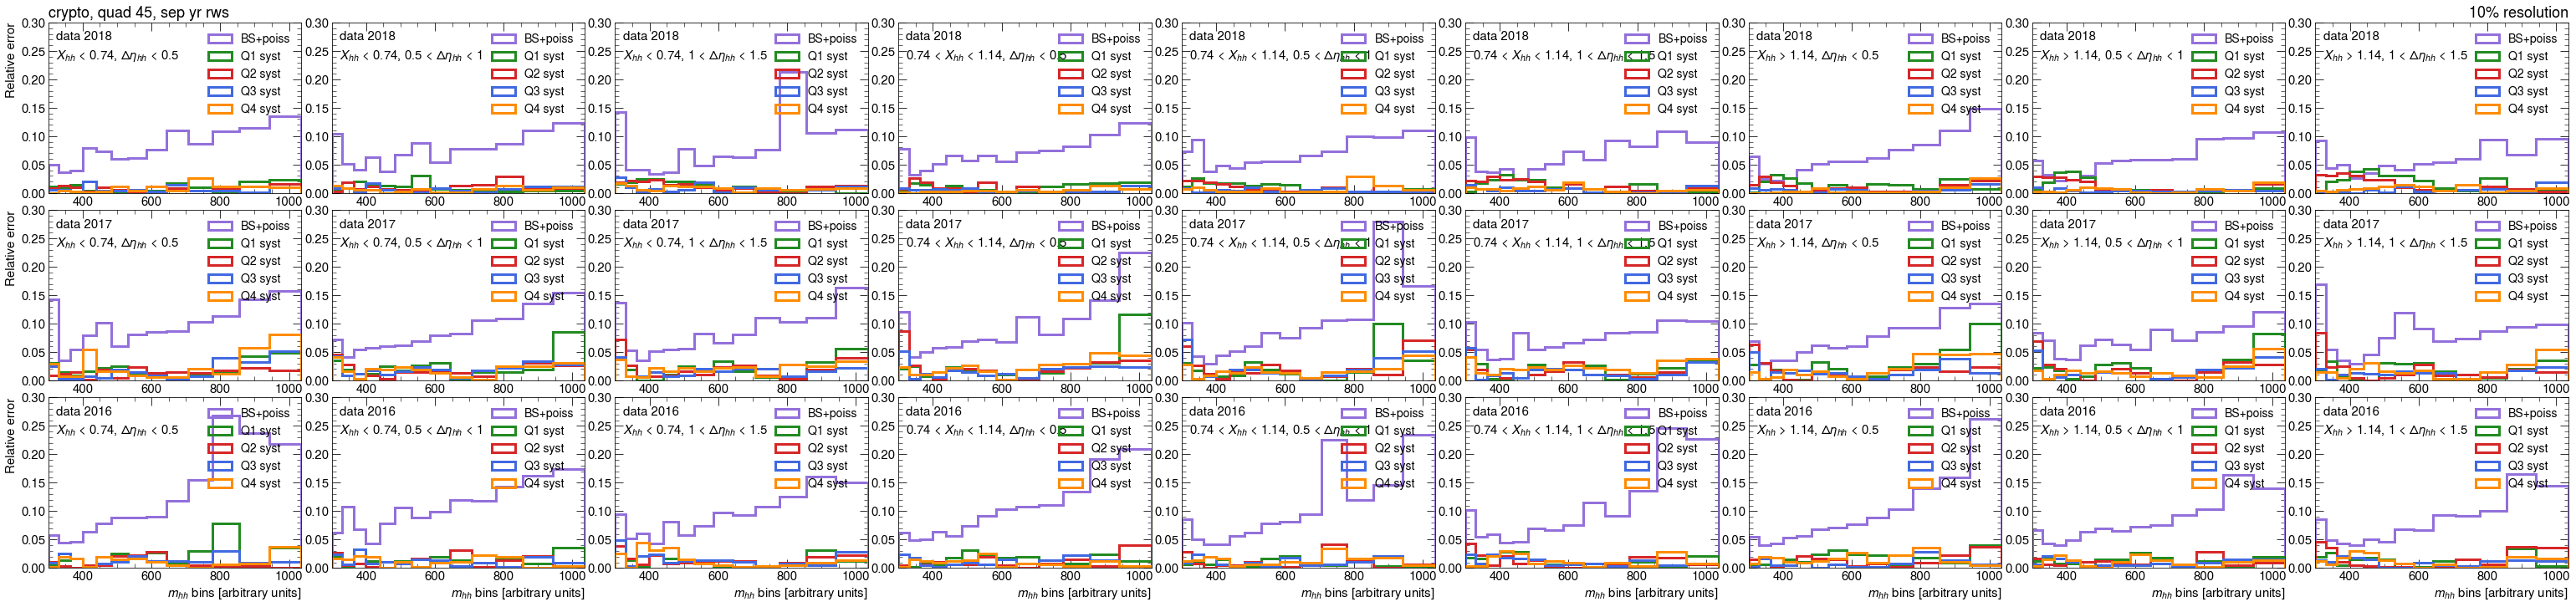

In [45]:
lo, hi = 300,950
res = 0.1
e = res_bin_edges(lo,hi,res)

visErrsDfs(dfs,e,catList=cat_3x3,ltitle="crypto, quad 45, sep yr rws",
           rtitle=f'{int(100*res)}% resolution', figDir=figDir,
           tag=f'3_Xhh_3_deta_{lo}_{hi}_res_{res}')